Project 2: Randomized Optimization

tpham328

Source:

Rollings, A. (2020). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python, hiive extended remix. https://github.com/hiive/mlrose. Accessed: day month year.

Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python. https://github.com/gkhayes/mlrose. Accessed: day month year.

In [68]:

import numpy as np
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
from mlrose_hiive import SARunner, GARunner, RHCRunner
import networkx as nx
from IPython.core.display import display, HTML

In [69]:
# Define fitness function and problem
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_length = 50
problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2)
seeds = 1

In [70]:
# create a runner class and solve the problem

rhc = RHCRunner(problem=problem,
              experiment_name='4peak_rhc',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seeds,
              iteration_list=2 ** np.arange(14),
              max_attempts=100,
              restart_list=[5,10,20,50])

sa = SARunner(problem=problem,
              experiment_name='4peak_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seeds,
              iteration_list= 2** np.arange(14),
              max_attempts=100,
              temperature_list=[1.0, 5.0, 10.0, 100,400,500,1000,10000],
              decay_list=[mlrose.GeomDecay])


ga = GARunner(problem=problem,
              experiment_name='4peak_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seeds,
              iteration_list= 2** np.arange(14),
              population_sizes=[10, 20, 50],
              mutation_rates=[0.02, 0.05, 0.1, 0.2])

In [71]:
# the two data frames will contain the results
df_run_stats_rhc, df_run_curves_rhc = rhc.run()
df_run_stats_rhc.to_csv('4peak_statsRHC.csv', index = False)
df_run_curves_rhc.to_csv('4peak_curveRHC.csv', index = False)

#SA
df_run_stats_sa, df_run_curves_sa = sa.run()
df_run_stats_sa.to_csv('4peak_statsSA.csv', index = False)
df_run_curves_sa.to_csv('4peak_curveSA.csv', index = False)

#GA
df_run_stats_ga, df_run_curves_ga = ga.run()
df_run_stats_ga.to_csv('4peak_statsGA.csv', index = False)
df_run_curves_ga.to_csv('4peak_curveGA.csv', index = False)


In [72]:

print('RUN STATS ', df_run_stats_rhc.columns)
print('RUN CURVE ',df_run_curves_rhc.columns)
print('RHC ', df_run_stats_rhc.shape)
print(df_run_curves_rhc.shape)
print('SA ', df_run_stats_sa.shape)
print(df_run_curves_sa.shape)
print('GA ', df_run_stats_ga.shape)
print(df_run_curves_ga.shape)


RUN STATS  Index(['Iteration', 'Fitness', 'FEvals', 'Time', 'State', 'Restarts',
       'max_iters', 'current_restart'],
      dtype='object')
RUN CURVE  Index(['Iteration', 'Time', 'Fitness', 'FEvals', 'Restarts', 'max_iters',
       'current_restart'],
      dtype='object')
RHC  (1335, 8)
(29987, 7)
SA  (120, 12)
(13606, 6)
GA  (180, 8)
(15355, 7)


In [73]:

best_fitness_rhc = df_run_curves_rhc['Fitness'].max()
best_runs_rhc = df_run_stats_rhc[df_run_stats_rhc['Fitness'] == best_fitness_rhc]
best_runs_rhc = best_runs_rhc.sort_values(by ='FEvals', ascending = True)

HTML(best_runs_rhc.to_html())

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
1016,1024,91.0,11716,24.208166,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",50,8192,29
1017,2048,91.0,11716,24.208166,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",50,8192,29
1018,4096,91.0,11716,24.208166,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",50,8192,29
1019,8192,91.0,11716,24.208166,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",50,8192,29


In [74]:
best_fitness_sa = df_run_curves_sa['Fitness'].max()
best_runs_sa = df_run_stats_sa[df_run_stats_sa['Fitness'] == best_fitness_sa]
best_runs_sa = best_runs_sa.sort_values(by ='FEvals', ascending = True)

HTML(best_runs_sa.to_html())

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
87,2048,91.0,2483,0.417590,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",geometric,500.0,0.99,0.001,497.905936,500,8192
88,4096,91.0,2483,0.417590,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",geometric,500.0,0.99,0.001,497.905936,500,8192
89,8192,91.0,2483,0.417590,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",geometric,500.0,0.99,0.001,497.905936,500,8192
57,2048,91.0,2701,0.437833,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",geometric,100.0,0.99,0.001,99.560930,100,8192
58,4096,91.0,2701,0.437833,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",geometric,100.0,0.99,0.001,99.560930,100,8192
59,8192,91.0,2701,0.437833,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",geometric,100.0,0.99,0.001,99.560930,100,8192


In [75]:
best_fitness_ga = df_run_curves_ga['Fitness'].max()
best_runs_ga = df_run_stats_ga[df_run_stats_ga['Fitness'] == best_fitness_ga]
best_runs_ga = best_runs_ga.sort_values(by ='FEvals', ascending = True)

HTML(best_runs_ga.to_html())

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
174,256,91.0,13130,0.790847,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",50,0.2,8192
175,512,91.0,26186,1.477005,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",50,0.2,8192
176,1024,91.0,33530,1.854332,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",50,0.2,8192
177,2048,91.0,33530,1.854332,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",50,0.2,8192
178,4096,91.0,33530,1.854332,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",50,0.2,8192
179,8192,91.0,33530,1.854332,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",50,0.2,8192
102,2048,91.0,41177,2.370409,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",20,0.1,8192
103,4096,91.0,41177,2.370409,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",20,0.1,8192
104,8192,91.0,41177,2.370409,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",20,0.1,8192


# FITNESS VS ITERATION
Over 20 random seed

In [76]:
import numpy as np
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt

# Parameters
max_attempts = 100
max_iters = 5000
random_states = list(range(1,21)) # List of random states

# Initialize arrays to accumulate the results
rhc_fitness_curves = []
sa_fitness_curves = []
ga_fitness_curves = []
rhc_feval_curves = []
sa_feval_curves = []
ga_feval_curves = []

# Iterate over the random states
for random_state in random_states:
    # Run RHC
    _, _, rhc_fitness_curve = mlrose.random_hill_climb(
        problem, max_attempts=max_attempts, max_iters=max_iters, restarts=50, curve=True, random_state=random_state)
    rhc_fitness_curves.append(rhc_fitness_curve[:, 0])
    rhc_feval_curves.append(rhc_fitness_curve[:, 1])

    # Run SA
    _, _, sa_fitness_curve = mlrose.simulated_annealing(
        problem, schedule=mlrose.GeomDecay(init_temp=500, decay=0.99, min_temp=0.001), max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_state)
    sa_fitness_curves.append(sa_fitness_curve[:, 0])
    sa_feval_curves.append(sa_fitness_curve[:, 1])

    # Run GA
    _, _, ga_fitness_curve = mlrose.genetic_alg(
        problem, pop_size=50, mutation_prob=0.2, max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_state)
    ga_fitness_curves.append(ga_fitness_curve[:, 0])
    ga_feval_curves.append(ga_fitness_curve[:, 1])
  


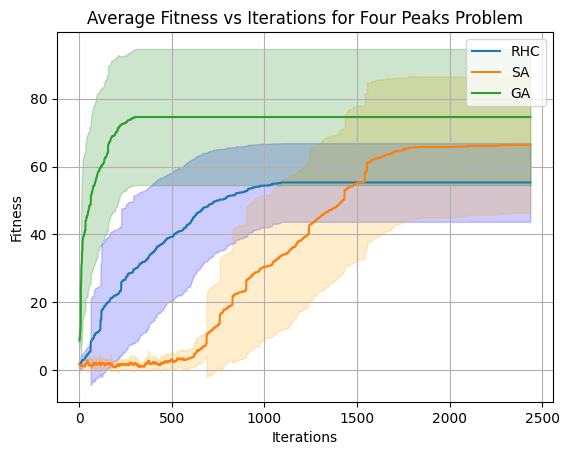

RHC best fitness: 55.3
SA best fitness: 66.4
GA best fitness: 74.6


In [77]:

# Find the maximum length of the fitness curves
max_length = max(len(curve) for curve in rhc_fitness_curves + sa_fitness_curves + ga_fitness_curves)

# Function to pad fitness curves to the same length
def pad_curve(curve, max_length):
    return np.pad(curve, (0, max_length - len(curve)), 'edge')

# Pad all fitness curves
rhc_fitness_curves = np.array([pad_curve(curve, max_length) for curve in rhc_fitness_curves])
sa_fitness_curves = np.array([pad_curve(curve, max_length) for curve in sa_fitness_curves])
ga_fitness_curves = np.array([pad_curve(curve, max_length) for curve in ga_fitness_curves])

# Calculate the average fitness curves
avg_rhc_fitness_curve = np.mean(rhc_fitness_curves, axis=0)
avg_sa_fitness_curve = np.mean(sa_fitness_curves, axis=0)
avg_ga_fitness_curve = np.mean(ga_fitness_curves, axis=0)

# Calculate the standard deviation of the fitness curves
std_rhc_fitness_curve = np.std(rhc_fitness_curves, axis=0)
std_sa_fitness_curve = np.std(sa_fitness_curves, axis=0)
std_ga_fitness_curve = np.std(ga_fitness_curves, axis=0)

# Plot results
plt.figure()
plt.plot(avg_rhc_fitness_curve, label='RHC')
plt.plot(avg_sa_fitness_curve, label='SA')
plt.plot(avg_ga_fitness_curve, label='GA')

plt.fill_between(range(max_length), 
                 avg_rhc_fitness_curve - std_rhc_fitness_curve, 
                 avg_rhc_fitness_curve + std_rhc_fitness_curve, 
                 color='blue', alpha=0.2)
plt.fill_between(range(max_length), 
                 avg_sa_fitness_curve - std_sa_fitness_curve, 
                 avg_sa_fitness_curve + std_sa_fitness_curve, 
                 color='orange', alpha=0.2)
plt.fill_between(range(max_length), 
                 avg_ga_fitness_curve - std_ga_fitness_curve, 
                 avg_ga_fitness_curve + std_ga_fitness_curve, 
                 color='green', alpha=0.2)

plt.title('Average Fitness vs Iterations for Four Peaks Problem')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.grid()
plt.show()

# Print best fitness values (averaged over the random states)
print(f'RHC best fitness: {np.mean([curve[-1] for curve in rhc_fitness_curves])}')
print(f'SA best fitness: {np.mean([curve[-1] for curve in sa_fitness_curves])}')
print(f'GA best fitness: {np.mean([curve[-1] for curve in ga_fitness_curves])}')

# FEvals

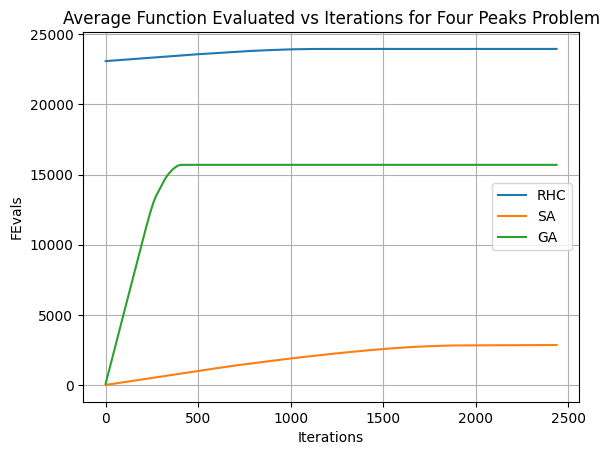

RHC highest FEvals: 23954.25
SA highest FEvals: 2846.6
GA highest FEvals: 15690.2


In [78]:

# Find the maximum length of the fitness curves
max_length = max(len(curve) for curve in rhc_feval_curves + sa_feval_curves + ga_feval_curves)

# Function to pad fitness curves to the same length
def pad_curve(curve, max_length):
    return np.pad(curve, (0, max_length - len(curve)), 'edge')

# Pad all fitness curves
rhc_feval_curves = np.array([pad_curve(curve, max_length) for curve in rhc_feval_curves])
sa_feval_curves = np.array([pad_curve(curve, max_length) for curve in sa_feval_curves])
ga_feval_curves = np.array([pad_curve(curve, max_length) for curve in ga_feval_curves])

# Calculate the average fitness curves
avg_rhc_feval_curve = np.mean(rhc_feval_curves, axis=0)
avg_sa_feval_curve = np.mean(sa_feval_curves, axis=0)
avg_ga_feval_curve = np.mean(ga_feval_curves, axis=0)

# Plot results
plt.figure()
plt.plot(avg_rhc_feval_curve, label='RHC')
plt.plot(avg_sa_feval_curve, label='SA')
plt.plot(avg_ga_feval_curve, label='GA')
plt.title('Average Function Evaluated vs Iterations for Four Peaks Problem')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.legend()
plt.grid()
plt.show()

# Print best fitness values (averaged over the random states)
print(f'RHC highest FEvals: {np.mean([curve[-1] for curve in rhc_feval_curves])}')
print(f'SA highest FEvals: {np.mean([curve[-1] for curve in sa_feval_curves])}')
print(f'GA highest FEvals: {np.mean([curve[-1] for curve in ga_feval_curves])}')

# Fitness vs Problem size

In [79]:
# Define fitness function
fitness = mlrose.FourPeaks(t_pct=0.15)

# Parameters
problem_lengths = np.arange(10, 101, 10)  # Problem lengths to iterate over
max_attempts = 100
max_iters = 5000
random_states = list(range(1, 21))  # List of random states

# Initialize arrays to accumulate the results
rhc_best_fitness = []
sa_best_fitness = []
ga_best_fitness = []

In [80]:
# Iterate over the problem lengths
for problem_length in problem_lengths:
    # Define the problem
    problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2)
    
    rhc_fitness = []
    sa_fitness = []
    ga_fitness = []

    # Iterate over the random states
    for random_state in random_states:
        # Run RHC
        _, best_fitness_rhc, _ = mlrose.random_hill_climb(
            problem, max_attempts=max_attempts, max_iters=max_iters, restarts=50, curve=True, random_state=random_state)
        rhc_fitness.append(best_fitness_rhc)

        # Run SA
        _, best_fitness_sa, _ = mlrose.simulated_annealing(
            problem, schedule=mlrose.GeomDecay(init_temp=400, decay=0.99, min_temp=0.001), max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_state)
        sa_fitness.append(best_fitness_sa)

        # Run GA
        _, best_fitness_ga, _ = mlrose.genetic_alg(
            problem, pop_size=50, mutation_prob=0.2, max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_state)
        ga_fitness.append(best_fitness_ga)

    # Calculate the average best fitness for the current problem length
    rhc_best_fitness.append(np.mean(rhc_fitness))
    sa_best_fitness.append(np.mean(sa_fitness))
    ga_best_fitness.append(np.mean(ga_fitness))

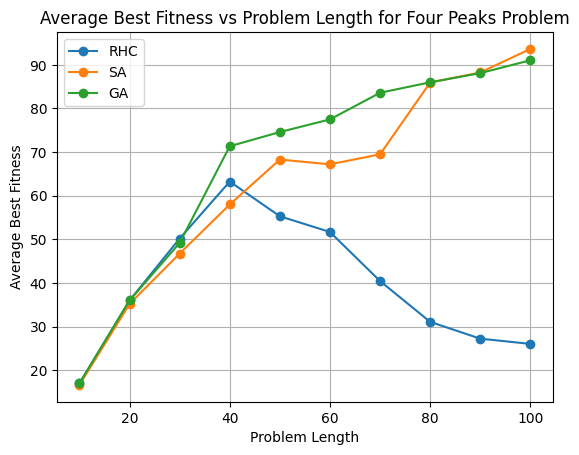

In [81]:
# Plot results
plt.figure()
plt.plot(problem_lengths, rhc_best_fitness, label='RHC', marker='o')
plt.plot(problem_lengths, sa_best_fitness, label='SA', marker='o')
plt.plot(problem_lengths, ga_best_fitness, label='GA', marker='o')

plt.title('Average Best Fitness vs Problem Length for Four Peaks Problem')
plt.xlabel('Problem Length')
plt.ylabel('Average Best Fitness')
plt.legend()
plt.grid()
plt.show()